In [1]:
#|default_exp app

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

/home/layaasiv/miniconda3/envs/fastai310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
img = np.load('img1.npy')
img.shape

(168, 308)

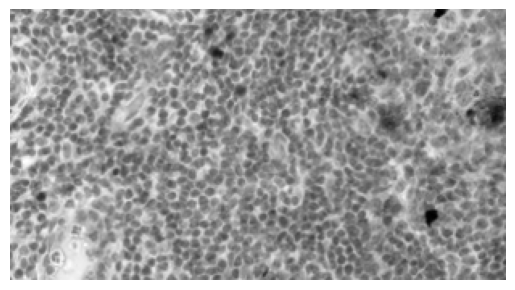

In [3]:
plt.imshow(Image.fromarray(img), cmap='gray')
plt.axis('off')
plt.show()

In [4]:
#|export
def get_x(row):
    idx = row['idx']
    img_pix = trn_x[idx]
    img_pix = np.stack([img_pix]*3, axis=-1)
    return PILImage.create(img_pix.astype(np.uint8))

In [5]:
#|export
learn = load_learner('model.pkl')

/home/layaasiv/miniconda3/envs/fastai310/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [6]:
learn.predict(img)

('17',
 tensor(17),
 tensor([2.3686e-06, 1.5473e-04, 2.0268e-05, 3.7693e-05, 3.7202e-06, 2.9186e-06,
         1.4540e-06, 9.5310e-07, 1.5306e-06, 1.3453e-05, 8.8670e-06, 3.8275e-06,
         2.2402e-06, 7.7107e-07, 8.6877e-03, 2.2604e-04, 1.6393e-06, 9.9082e-01,
         1.1205e-05, 1.5414e-06]))

In [7]:
#|export
categories = [str(i) for i in range(20)]
categories = tuple(categories)

def classify_imgs(x):
    pred,idx,probs = learn.predict(x)
    return dict(zip(categories,probs))

In [8]:
classify_imgs(img)

{'0': tensor(2.3686e-06),
 '1': tensor(0.0002),
 '2': tensor(2.0268e-05),
 '3': tensor(3.7693e-05),
 '4': tensor(3.7202e-06),
 '5': tensor(2.9186e-06),
 '6': tensor(1.4540e-06),
 '7': tensor(9.5310e-07),
 '8': tensor(1.5306e-06),
 '9': tensor(1.3453e-05),
 '10': tensor(8.8670e-06),
 '11': tensor(3.8275e-06),
 '12': tensor(2.2402e-06),
 '13': tensor(7.7107e-07),
 '14': tensor(0.0087),
 '15': tensor(0.0002),
 '16': tensor(1.6393e-06),
 '17': tensor(0.9908),
 '18': tensor(1.1205e-05),
 '19': tensor(1.5414e-06)}

In [9]:
#|export
examples = [np.load('img1.npy'), np.load('img2.npy'), np.load('img3.npy'), np.load('img4.npy'), np.load('img5.npy')]

intf = gr.Interface(fn=classify_imgs, inputs=gr.Image(), outputs=gr.Label(), examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [1]:
import nbdev

In [3]:
nbdev.export.nb_export('app.ipynb', '.')